## Analysing Shakespeare's Work 



## 1. Wordcloud

Wordclouds highlight important textual data points to immediately convey crucial information in extracts. I am using the `wordcloud` library in python to create my wordcloud.

Used the following to install `wordcloud`

    pip install wordcloud
    
Following this, I am importing the `wordcloud`, `matplotlib`, `pandas` and `numpy`. 

In [1]:
# Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#First 244 lines and last 15 lines is copyright information so removing that
# df

### 1.1 Data cleaning 
I have cleaned the text extracts by removing the following:

* Initial contents of the book (first 244 lines and last 15 lines is copyright information)
* Copyright information throughout
* Removing stopwords 

to only highlight crucial words. 

In [2]:
df = pd.read_table("t8.shakespeare.txt", skiprows=[i for i in range(0,244)], engine = 'python', skipfooter =15, header=None)

# Removing the copyright information from the df
copyright_info = '''<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>'''

copyright_info = copyright_info.split('\n')
copyright_info.append("by William Shakespeare")    
row_list = [index for index, row in df.iterrows() if row[0] in copyright_info]

df.drop(row_list, axis=0, inplace=True)

Converting the entire text into a string of words. 

In [5]:
comment_words = ''
stopwords_list = pd.read_csv("stopwords.txt",sep=" ", header=None)

for val in df[0]:     
    val = str(val)
    tokens = val.split()
     
    for i in range(len(tokens)):tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

### 1.2 Generating the wordcloud

In [6]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list[0],
                min_font_size = 10).generate(comment_words)

### 1.3 Plotting the wordcloud

Using `matplotlib` to plot the wordcloud below.

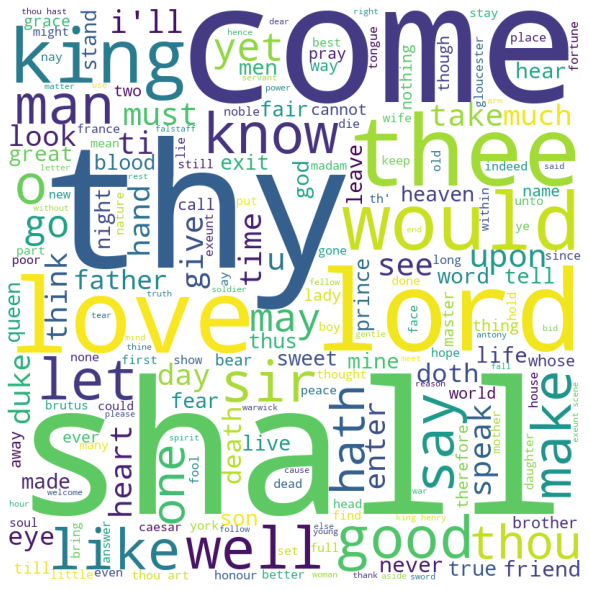

In [7]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 1.4 Average number of words per sentence

Let's calculate the average number of words per sentence for different genres of shakespearean work.

**Poems**: Extracting poem data from the .txt file and creating the dataframe `poem_df`. This dataframe will have sonnets and poems only.


In [7]:
id1=''
id2='0'
data = []
for val in df[0]:
    if val.isdigit() == True: 
        id1=val
        id2='0'
    elif val.replace(' ', '').isdigit(): id2=val.replace(' ', '')
    else:data.append([id1, id2, val])

In [8]:
df2 = pd.DataFrame(data=data, columns=['id1','id2','sentences'])
end_list = [index for index, row in df2.iterrows() if 'THE END' in row['sentences']]

poem_df = df2[0:end_list[0]].append(df2[end_list[-2]+1:end_list[-1]], ignore_index=True)
# poem_df

In [9]:
from statistics import mean

words_per_sentence_in_poems = []

for s in poem_df['sentences']:
    words = s.split()
    words_per_sentence_in_poems.append(len(words))

print("The average number of words per sentence for poems is", mean(words_per_sentence_in_poems))

The average number of words per sentence for poems is 8.103781174577636


**Plays**: Extracting play data from a new .csv file and creating the dataframe `plays_df`. This dataframe will have all the plays.

In [10]:
import pandas as pd

plays = pd.read_csv("Shakespeare_data.csv", keep_default_na = False)

In [11]:
play_title=""
content =""
words=""

plays_data = []

for i, line in enumerate(plays['PlayerLine']):
    
    if (play_title == plays['Play'][i]):
        content += " ".join(line.split())+" "
    else:
        plays_data.append([play_title, content])
        play_title=plays['Play'][i]
        content = " ".join(line.split())+" "

plays_data.pop(0)

['', '']

Creating a function `getType` to categorise various plays into the following genres:
* Comedy
* Tragedy
* History

In [12]:
categories = pd.read_csv("shakespeare_categories.csv", keep_default_na = False)

def getType(title):
    if (categories['comedies'].str.contains(title.lower()).any()): return 'Comedy'
    if (categories['tragedies'].str.contains(title.lower()).any()): return 'Tragedy'
    if (categories['histories'].str.contains(title.lower()).any()): return 'History'
    else: return 'Unknown'

Tokenizing the sentences of the plays to calculate the average words per sentence

In [14]:
import nltk

line_list = []
for i, play in enumerate(plays_data):    
    tokens = nltk.sent_tokenize(play[1])
    play_type = getType(play[0])

    for t in tokens:
        line_list.append([play[0], t, play_type])

In [15]:
plays_df = pd.DataFrame(data=line_list, columns=['PlayTitle','Token','Category'])

from statistics import mean

words_per_sentence_in_plays = []

for i, s in enumerate(plays_df['Token']):
    words = s.split()
    words_per_sentence_in_plays.append(len(words))

            
plays_df['WordCount'] =  words_per_sentence_in_plays
print("The average number of words per sentence for plays is", mean(words_per_sentence_in_plays))

The average number of words per sentence for plays is 14.935225811332174


The average number of words per senetnce across all Shakespere's work can be a mean of the number of words per sentence in all this works. Here we can merge the two lists`words_per_sentence_in_poems` and `words_per_sentence_in_plays`

In [16]:
print("The average number of words per sentence for all of Shakespeare's work is", str(mean(words_per_sentence_in_poems + words_per_sentence_in_plays)))
# print(len(words_per_sentence_in_poems), len(words_per_sentence_in_plays))

The average number of words per sentence for all of Shakespeare's work is 14.628463567067664


In [17]:
cat_df = plays_df.groupby('Category').mean('WordCount')
for cat, mean in enumerate(cat_df["WordCount"]):
    print("The average number of words per sentence for "+cat_df.index[cat]+" is", mean)

The average number of words per sentence for Comedy is 14.436610943827224
The average number of words per sentence for History is 17.128515928515927
The average number of words per sentence for Tragedy is 14.037456613960662


>**Part 1**: The average number of words per sentence for **poems** is ~8 words and for **plays** ~15 words. Overall, for Shakespeare's work, we observe that the mean is ~15 words. This is heavily skewed towards the mean of the play's sentences. After all, the content of plays has about *52,876* sentences while the poems only have about *2486* lines. 

Moreover, categorising by the genre of the plays, the average number of words per sentence 
* for Comedy is ~14 words
* for History is ~17 words
* for Tragedy is ~14 words

We could also normalise them using: 
```
    new_mean = mean([mean(words_per_sentence_in_poems),mean(words_per_sentence_in_plays)])
    print("The average number of words per sentence for plays is", new_mean)
```
which will result in `The average number of words per sentence for plays is 11.519503492954904`
